In [1]:
from scipy.signal import argrelextrema
import cv2
import numpy as np
from matplotlib import pyplot as plt


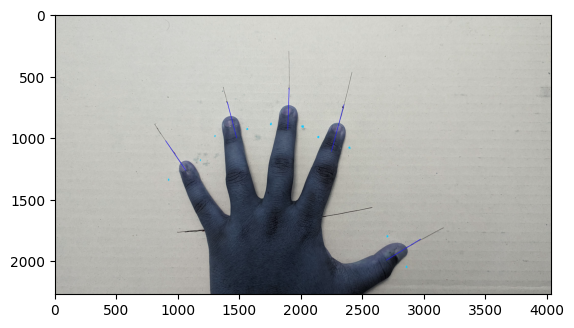

In [2]:
# manually define 
lines=[[896,1027,1128,1366],[1392,701,1471,989],[1898,628,1892,934],[2354,705,2257,1047],[2989,1816,2702,1975]]
# [  [x1,y1,x2,y2]] points manually plottes of lines F1-F6

plotted_points=[[989,1452,1229,1296],[1292,1046,1612,920],[1758,927,2020,923],[2134,1020,2457,1090],[2608,1874,2802,2161]] 
# points on either side of each finger along the perpendicular axis 
# display image where manual points are placed 
plotted_image_path='./BIO_A3/plotted hand image2.png'
img = cv2.imread(plotted_image_path)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)

In [3]:
def get_slope(x1,y1,x2,y2):
    # slope of perpendicular axis with given points on F1,F2...
    if x2 - x1 == 0:  # Avoid division by zero
        slope = 'infinity'  # Line is vertical
    else:
        slope = (y2 - y1) / (x2 - x1)
    
    # Calculate the slope of the perpendicular line
    if slope == 'infinity':  # Perpendicular to a vertical line is a horizontal line
        perpendicular_slope = 0
    elif slope == 0:  # Perpendicular to a horizontal line is a vertical line
        perpendicular_slope = 'infinity'
    else:
        perpendicular_slope = -1 / slope
    
    return  perpendicular_slope
    

In [4]:
def calculate_distance(point1, point2):
    return (point2-point1)

In [5]:
def inetensis_along_line(xs,xe,slope,image,c):
    intens=[]
    for x in range(xs,xe):
        y=slope*x + c
        intens.append(image[int(y),int(x)])
    return intens
        
    

In [6]:
def get_ps_pe(image,points,slope):
    x1,y1,x2,y2=points[0],points[1],points[2],points[3]
    c=y1-slope*x1
    intensity_values=inetensis_along_line(x1,x2,slope,image,c)
    
   
    
    ps,pe=min(intensity_values)
    return intensity_values, ps,pe
        
# def get_local_minimas(intensity_values):
#     # plt.figure(figsize=(10, 4))
#     # plt.plot(intensity_values, marker='o', linestyle='-', color='b')
#     plt.title('Intensity Values Along the Line')
#     plt.xlabel('Pixel Position')
#     plt.ylabel('Intensity Value')
#     plt.grid(True)

#     return minn(intensity_values)
    
    

            
     

In [7]:
# To find local minima in an array of continuous values, we can use the argrelextrema function from scipy.signal.
# This function is specifically designed to find the relative extrema in an array.

from scipy.signal import argrelextrema
import numpy as np

# Define an array of continuous values
def minn(continuous_values):
    continuous_values=np.array(continuous_values)
    # Find indices of local minima using argrelextrema
    local_minima_indices = argrelextrema(continuous_values, np.less)[0]
    
    # Extract the local minima values using these indices
    local_minima_values = continuous_values[local_minima_indices]
    lm=0
    rm=0
    # indii=[x for x in range(len(local_minima_indices))]
    # print(indii)
    # print(local_minima_indices)
    # print(local_minima_values)
    n= len(local_minima_values)
    # initail_inten=local_minima_values[0]
    # thr=10

    
    # for index,inten in enumerate(local_minima_values):
    #     if initail_inten - inten > thr:
    #         lm=index
    #         break
    # initail_inten=local_minima_values[-1]
    # for i in range(n - 1, -1, -1):
    #     inten=local_minima_values[i]
    #     if initail_inten - inten > thr:
    #         rm=i
    #         break
   
    lm=dip(local_minima_values)
    # print(local_minima_indices[lm])
    ps=local_minima_indices[lm]
    rm=dip(local_minima_values[::-1])
    rm=n-rm-1
    # print(local_minima_indices[rm])
    pe=local_minima_indices[rm]
    if(local_minima_values[-1]<75):
        pe=local_minima_indices[-1]
        # print('hg')
        
        # print(pe)
        # print('hg')
    return ps,pe

    


In [8]:
def dip(vals):
    current_val = vals[0]
    lm = None
    t=40

    for i in range (1,len(vals)-1):
        inten=vals[i]
        if vals[i-1]-inten >0 and inten < 150:# and i< len(vals)/2:
            lm=i
            if vals[i+1]>inten:
                break
    return lm



/var/folders/np/gq4pf7wx2b1btsznkmxtvtzh0000gn/T/ipykernel_60722/2892741769.py:8: RuntimeWarning: overflow encountered in scalar subtract
  if vals[i-1]-inten >0 and inten < 150:# and i< len(vals)/2:


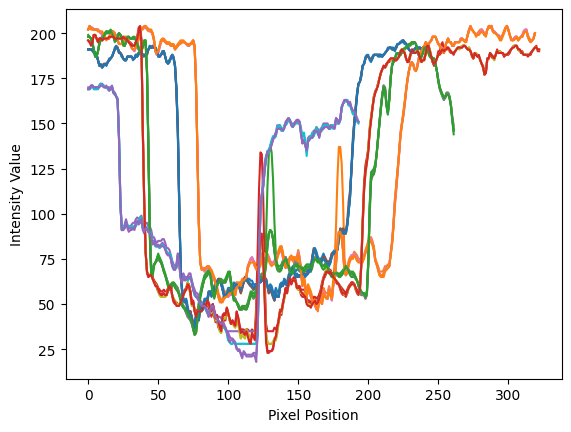

<Figure size 3500x1000 with 0 Axes>

In [9]:
images=['./BIO_A3/H1.png', './BIO_A3/H2.png', './BIO_A3/H3.png', './BIO_A3/H4.png', './BIO_A3/H5.png']


 # paths of images 

# fingers_lens=[]
all_fingers=[]
im=1
for image_path in images:
    # print('IMAGE ', im)
    im+=1
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if the image was loaded correctly
    
    if image is None:
        raise ValueError(f"Image at path '{image_path}' could not be read. Please check the file path and permissions.")
    
    # Apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    finger_lens=[]
    f=1
    for line,points in zip(lines,plotted_points):
        # print('_____________ FINGER _______________',f)
        f+=1
        x1,y1,x2,y2=line
        pp_slope=get_slope(x1,y1,x2,y2)

        ints,p1,p2=get_ps_pe(blurred,points,pp_slope)
        plt.plot(ints)
        plt.xlabel('Pixel Position')
        plt.ylabel('Intensity Value')
        finger_lens.append(calculate_distance(p1,p2))
    all_fingers.append(finger_lens)
plt.figure(figsize=(35, 10)) # Larger figure size


plt.show()

    # print(finger_lens)
    

    # print(len(fl))
        




In [10]:
def print_mat(hand_images):
    # [[f1,f2,..],[],...]
    # convert into lower triangle and print 
    num_images = hand_images.shape[0]
    print('PAIR WISE COMPARISION EUCLIDIAN DISTANCE ')
    distance_matrix = np.zeros((num_images, num_images))

    for i in range(num_images):
        for j in range(i+1, num_images):  # Fill only the upper triangular part
            distance_matrix[i, j] = np.linalg.norm(hand_images[i] - hand_images[j])
            
    distance_matrix[np.tril_indices(num_images, -1)] = 0


    print(distance_matrix)



In [11]:
print_mat(np.array(all_fingers))    


PAIR WISE COMPARISION EUCLIDIAN DISTANCE 
[[  0.          44.42971978 100.41414243  42.77849927  60.48966854]
 [  0.           0.          76.28237018  12.          37.08099244]
 [  0.           0.           0.          77.22046361  57.42821606]
 [  0.           0.           0.           0.          43.89760814]
 [  0.           0.           0.           0.           0.        ]]
